# Task 02
## Predicting Movie Rating Prediction with Python
### Submitted By: "Abdul Wahab"
### Submitted to: "CodSoft" 

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Importing Dataset into our Jupyter Notebook

In [2]:
movie = pd.read_csv("IMDb_Movies_India.csv", encoding="ISO-8859-1")
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


### 1. Data Cleaning
#### First of all we need to do cleaning to further proceed with our dataset.
-> Lets see some information about dataset.

In [3]:
movie.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [4]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


->Checking for the shape of DataFrame

In [5]:
movie.shape

(15509, 10)

->Checkin if there is any null values in our Dataset

In [6]:
movie.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

->Printing the attributes of our Dataset

In [7]:
movie.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

### Creating a New Dataframe
We have to create a new DataFrame that will have all values of rating excluding null values.

In [8]:
rating_df = movie[movie['Rating'].notnull()]
rating_df.isnull().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [9]:
rating_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [10]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7919 non-null   object 
 1   Year      7919 non-null   object 
 2   Duration  5851 non-null   object 
 3   Genre     7817 non-null   object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   object 
 6   Director  7914 non-null   object 
 7   Actor 1   7794 non-null   object 
 8   Actor 2   7719 non-null   object 
 9   Actor 3   7627 non-null   object 
dtypes: float64(1), object(9)
memory usage: 680.5+ KB


->Reseting the Index, to match them with our total rows

In [11]:
rating_df = rating_df.reset_index(drop=True)
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7919 entries, 0 to 7918
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7919 non-null   object 
 1   Year      7919 non-null   object 
 2   Duration  5851 non-null   object 
 3   Genre     7817 non-null   object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   object 
 6   Director  7914 non-null   object 
 7   Actor 1   7794 non-null   object 
 8   Actor 2   7719 non-null   object 
 9   Actor 3   7627 non-null   object 
dtypes: float64(1), object(9)
memory usage: 618.8+ KB


#### Cleaning the columns "Year", "Duration" and "Votes"

In [12]:
rating_df['Year'] = pd.to_numeric(rating_df['Year'].str.replace('(','').str.replace(')',''), errors='coerce', downcast='integer')
rating_df['Year']

0       2019
1       2019
2       1997
3       2005
4       2012
        ... 
7914    1992
7915    1989
7916    1988
7917    1999
7918    1998
Name: Year, Length: 7919, dtype: int16

In [13]:
rating_df['Duration'] = pd.to_numeric(rating_df['Duration'].str.replace('min',''), errors='coerce', downcast='integer')
rating_df['Duration']

0       109.0
1       110.0
2       147.0
3       142.0
4        82.0
        ...  
7914      NaN
7915    125.0
7916      NaN
7917    129.0
7918    130.0
Name: Duration, Length: 7919, dtype: float64

In [14]:
rating_df['Votes'] = pd.to_numeric(rating_df['Votes'].str.replace(',',''), errors='coerce', downcast='integer')
rating_df['Votes']

0          8
1         35
2        827
3       1086
4        326
        ... 
7914     135
7915      44
7916      11
7917     655
7918      20
Name: Votes, Length: 7919, dtype: int32

-> Lets see if there are any null values in out dataset

In [15]:
rating_df.isnull().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

-> As we can clearly see that "Duration" column has missing values, so replacing missing values with mean of whole column.

In [16]:
rating_df['Duration'] = rating_df['Duration'].fillna(rating_df['Duration'].mean())

### 2. Data Analysis
#### In this step we will try to find the attributes in our dataset that can be used for model making.
Moreover we will figure out which type of Machine Learning Algorithm we need to use for best Model output.

-> Lets Start by making some graph to make out goal clear

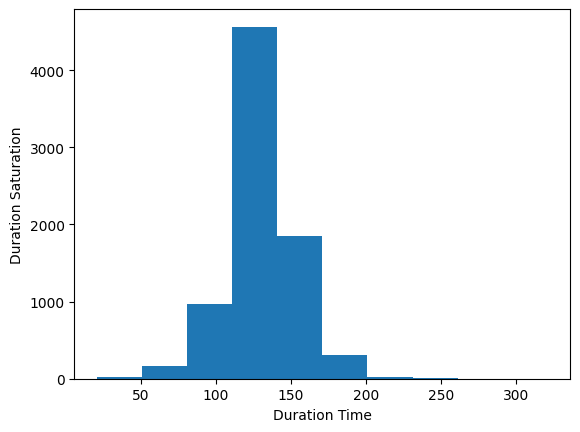

In [17]:
plt.hist(rating_df['Duration'])
plt.xlabel("Duration Time")
plt.ylabel("Duration Saturation")
plt.show()

-> We can clearly see that average duartion of movies is about 120 to 140 minutes

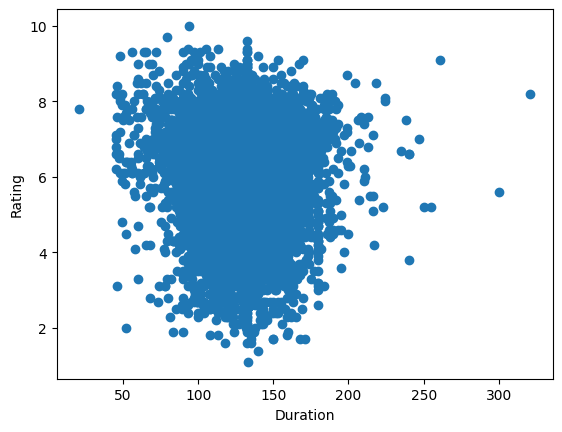

In [18]:
plt.scatter(rating_df['Duration'], rating_df['Rating'])
plt.xlabel("Duration")
plt.ylabel("Rating")
plt.show()

-> By above graph, it is not clear, so lets see the correlation between "Votes" and "Rating" column.

In [19]:
correlation_coefficient = rating_df['Votes'].corr(rating_df['Rating'])
print(correlation_coefficient)

0.12663518946687152


-> The Correlation is possitive but not a strong one.

-> Lets see how our Rating column standup against Year column

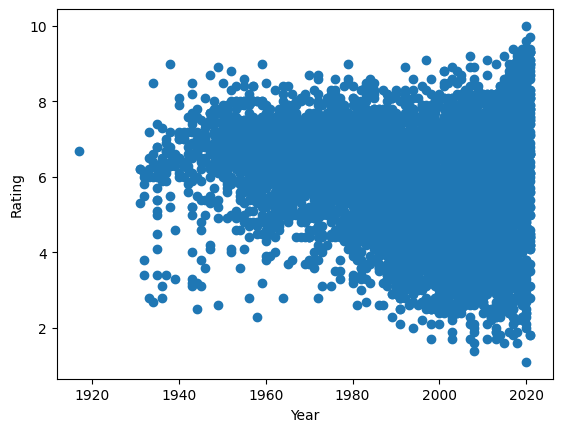

In [20]:
plt.scatter(rating_df['Year'], rating_df['Rating'])
plt.xlabel("Year")
plt.ylabel("Rating")
plt.show()

#### Shrinking our DataSet, to deal with only those attributes that are necessary for our Model creation

In [21]:
df = rating_df[['Name', 'Year', 'Duration', 'Votes','Rating']]
df.head()

,Name,Year,Duration,Votes,Rating
0,#Gadhvi (He thought he was Gandhi),2019,109.0,8,7.0
1,#Yaaram,2019,110.0,35,4.4
2,...Aur Pyaar Ho Gaya,1997,147.0,827,4.7
3,...Yahaan,2005,142.0,1086,7.4
4,?: A Question Mark,2012,82.0,326,5.6


-> Dividing our dataset into two parts, one will serve as independent variables and other will serve as dependent variable

In [22]:
X = df[['Year', 'Duration', 'Votes']]
Y = df[['Rating']]
X.head()

,Year,Duration,Votes
0,2019,109.0,8
1,2019,110.0,35
2,1997,147.0,827
3,2005,142.0,1086
4,2012,82.0,326


In [23]:
Y.head()

,Rating
0,7.0
1,4.4
2,4.7
3,7.4
4,5.6


### 3. Model Creation
In this Step first we will split our data into training and testing parts to evaluate our model later.

-> Train/ Test Splitting
In this step we will divide 80% of our data as train dataSet and 20% of our dataSet will server as test DataSet

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (6335, 3) (6335, 1)
Test set: (1584, 3) (1584, 1)


->Training Model on our Dataset

In [25]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train,Y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients:  [[-1.43389948e-02 -5.69503276e-03  1.92860951e-05]]
Intercept: [35.12673981]


### 4. Model Evaluation
-> In this step our trained model is evaluated on test set to check if this model is good enough to implement on Out of Sample Data.

In [26]:
yhat = regr.predict(X_test)

print("Mean Squared error(MSE): %.2f"% np.mean((yhat - Y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, Y_test))

Mean Squared error(MSE): 1.73
Variance score: 0.07


In [27]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat - Y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((yhat - Y_test) ** 2))
print("R2-score: %.2f" % r2_score(Y_test, yhat) )

Mean absolute error: 1.05
Residual sum of squares (MSE): 1.73
R2-score: 0.07
